# **Model Development**

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [167]:
# Reading DataSet
df = pd.read_csv("Clean_DataSet.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450,13.055556,Medium,0,1


In [168]:
from sklearn.linear_model import LinearRegression

In [169]:
# create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [170]:
# how we can use Highway-mpg to predict car price
X = df[['highway-mpg']]
Y = df['price']

In [171]:
# fit the linear model
lm.fit(X,Y)

LinearRegression()

In [172]:
# prediction
y_hat = lm.predict(X)
y_hat[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [173]:
# getting final linear model
a = lm.intercept_
b = lm.coef_
print("Intercept : ", a,"\n Coef : ",b)

Intercept :  38423.3058581574 
 Coef :  [-821.73337832]


Our Model is 


> **Price = 38423.31-821.73*highway-mpg**




In [174]:
# engine-size vs price
lm1 = LinearRegression()
lm1.fit(df[["engine-size"]],df["price"])

LinearRegression()

In [175]:
# prediction
y_hat = lm1.predict(df[["engine-size"]])
y_hat[0:4]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408])

In [176]:
# getting final linear model
a = lm1.intercept_
b = lm1.coef_
print("Intercept : ", a,"\n Coef : ",b)

Intercept :  -7963.338906281042 
 Coef :  [166.86001569]


Our Model is 


> **price = -7863.34+ 166.86*engine-size** 



Now we want to predict our price using more than one variable such as Horsepower,
Curb-weight,
Engine-size,
Highway-mpg.

So we will use multiple linear regression.

In [177]:
# define z 
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

# fit the model
lm.fit(Z, df['price'])

LinearRegression()

In [178]:
a = lm.intercept_
b = lm.coef_
print(a,'\n',b)

# prediction of car value
y_hat = lm.predict(Z)
print("Price of first 5 car models :",y_hat[0:5])

-15806.624627057427 
 [53.49574423  4.70770099 81.53026382 36.05748883]
Price of first 5 car models : [13699.11161184 13699.11161184 19051.65470248 10620.36193018
 15521.31420205]


Our Model is 


> **Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg**

Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

(0.0, 48176.11448171429)

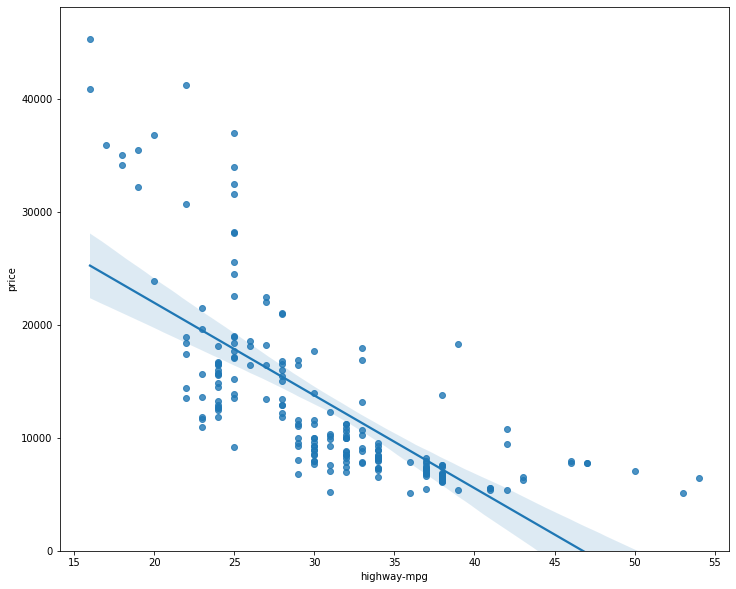

In [179]:
# price vs highway-mpg
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

(0.0, 47414.1)

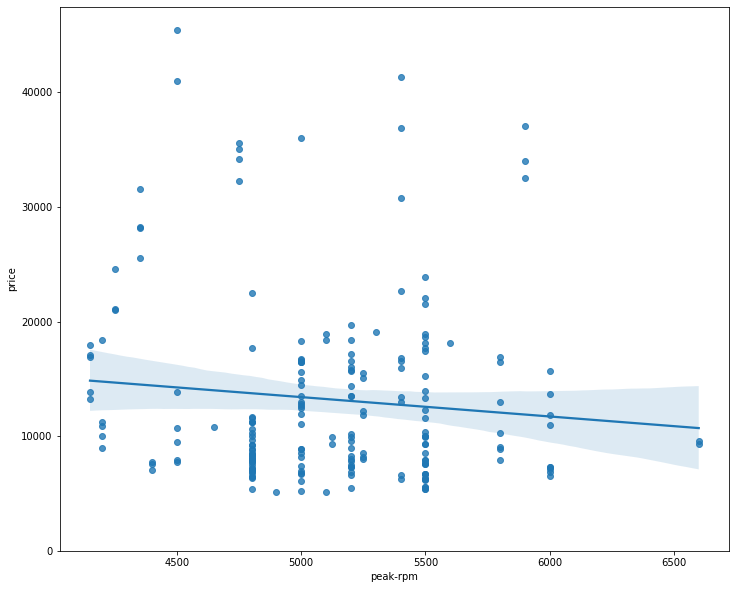

In [180]:
# compare this plot to the regression plot of "peak-rpm".

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

In [181]:
# varifing using correlation
df[['highway-mpg','price','peak-rpm']].corr()

,highway-mpg,price,peak-rpm
highway-mpg,1.000000,-0.704692,-0.058598
price,-0.704692,1.000000,-0.101616
peak-rpm,-0.058598,-0.101616,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


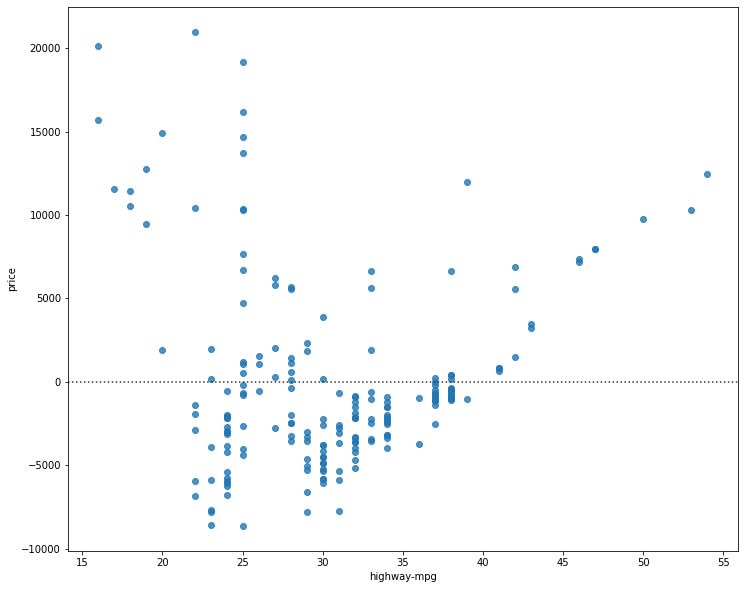

In [182]:
# residual plot for epsilon
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


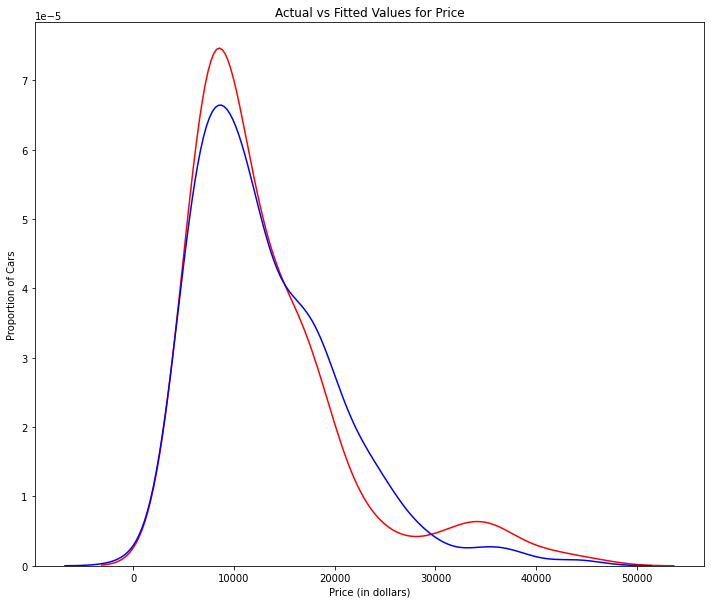

In [183]:
# MLR
# use distribution plot 

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist = False,  color="r", label="Actual Value")
sns.distplot(y_hat,hist = False,  color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

# Polynomial Regression

We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

We will use the following function to plot the data:


In [220]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [221]:
x = df['highway-mpg']
y = df['price']

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


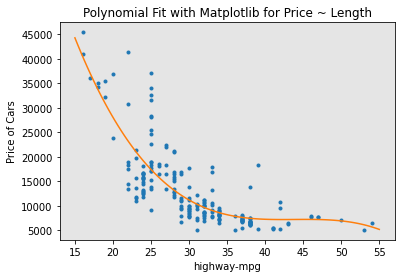

In [222]:
PlotPolly(p, x, y, 'highway-mpg')

In [223]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [227]:
# 11th order polynomial 
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


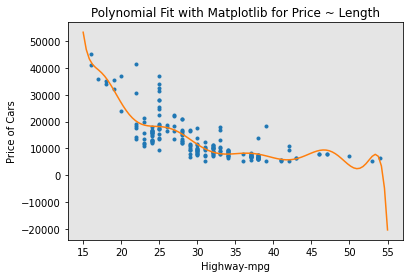

In [228]:
PlotPolly(p1,x,y,"Highway-mpg")

In [188]:
from sklearn.preprocessing import PolynomialFeatures

In [230]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [236]:
Z_pr=pr.fit_transform(Z)

In [237]:
Z.shape

(201, 4)

In [238]:
Z_pr.shape

(201, 15)

# Pipeline

In [239]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [240]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [241]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [242]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [243]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784203, 13102.74784203, 18225.54572209, 10390.29636566])

In [198]:
# Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470248, 10620.36193018,
       15521.31420205, 13869.66673208, 15456.16196728, 15974.00907669,
       17612.35917167, 10722.32509099])

# Measures for In-Sample Evaluation

# **MSE and R Squred**

In [199]:
#highway_mpg_fit
lm.fit(X,Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [200]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [212]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [215]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806600989


In [203]:
Y_predict_multifit = lm.predict(Z)

In [204]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.870578611


In [205]:
from sklearn.metrics import r2_score

In [206]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [207]:
mean_squared_error(df['price'], p(x))

20474146.426361218

# Prediction

<!--
Done
-->

In [208]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
new_input

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],

In [209]:
lm.fit(X, Y)
lm

LinearRegression()

In [210]:
yhat=lm.predict(new_input)
yhat[0:4]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487])

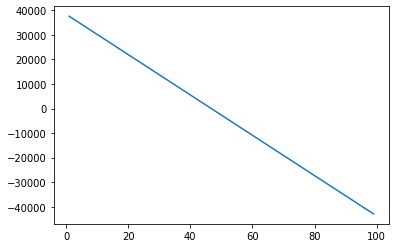

In [211]:
plt.plot(new_input, yhat)
plt.show()

When comparing models, the model with the higher R-squared value is a better fit for the data.


When comparing models, the model with the smallest MSE value is a better fit for the data.

Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

* R-squared: 0.49659118843391759
* MSE: 3.16 x10^7

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

* R-squared: 0.80896354913783497
* MSE: 1.2 x10^7

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

* R-squared: 0.6741946663906514
* MSE: 2.05 x 10^7

# **Conclusion**
Comparing these three models, we conclude that **the MLR model is the best model** to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.